<h1>Introduction</h1>
Zyfra is looking for a machine learning model to maximize efficiency for gold ore purification. This project provides exploratory data analysis as well as recommendations for machine learning models based on what kind of data Zyfra is looking to predict for their users.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression	
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
plt.style.use('ggplot')

Importing the data

In [52]:
gold_data_full = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/zyfra-gold-recovery/gold_recovery_full.csv', encoding = "utf-8")
gold_data_test = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/zyfra-gold-recovery/gold_recovery_test.csv', encoding = "utf-8")
gold_data_train = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/zyfra-gold-recovery/gold_recovery_train.csv', encoding = "utf-8")

Viewing the data and the information about it

In [53]:
display(gold_data_full.head())
gold_data_full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [54]:
display(gold_data_train.head())
gold_data_train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [55]:
display(gold_data_test.head())
gold_data_test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

<h2>Recovery Calculation</h2>

This function calculates recovery based on the formula provided in the task, and then returns the value that is calculated.

In [56]:
def recovery(df, column_1, column_2, column_3):
    c = df[column_1]
    f = df[column_2]
    t = df[column_3]
    recovery_calculated = ((c * (f-t)) / (f * (c-t))) * 100
    recovery_calculated = pd.DataFrame(recovery_calculated, columns={'recovery'})
    recovery_calculated['recovery'] = recovery_calculated['recovery'].where(recovery_calculated['recovery'] != np.inf, np.nan) 
    recovery_calculated.loc[recovery_calculated['recovery'] == float('-inf'), 'recovery'] = np.nan
    #recovery_calculated.dropna(inplace=True)
    filled_recovery_calculated = recovery_calculated['recovery'].notna()
    
    return filled_recovery_calculated
    

This code calls the above function and then calculates the MAE of the calculated value and the provided recovery value for both the rougher and final recovery values. The MAE is relatively low for both the rougher recovery and final recovery outputs.

In [57]:
rougher_recovery_calculated = recovery(gold_data_train, 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
final_recovery_calculated = recovery(gold_data_train, 'final.output.concentrate_au', 'rougher.output.concentrate_au', 'final.output.tail_au')

rougher_recovery_feature = gold_data_train['rougher.output.recovery'].notna()
final_recovery_feature = gold_data_train['final.output.recovery'].notna()

rougher_mae = mean_absolute_error(rougher_recovery_feature.astype(int), rougher_recovery_calculated.astype(int))

final_mae = mean_absolute_error(final_recovery_feature.astype(int), final_recovery_calculated.astype(int))


print('Rougher recovery MAE is', rougher_mae)
print('Final recovery MAE is', final_mae)

Rougher recovery MAE is 0.01542111506524318
Final recovery MAE is 0.03131672597864769


Upon comparison, it appears that all of the final stage features are missing from the test set, as well as any output features. In addition, the rougher "calculation" features are missing. These features will be dropped when working on the machine learning models.

In [58]:
gold_data_test.info()
gold_data_train.info()
gold_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

<h2>Data Preprocessing</h2>

This function is written to perform data preprocessing that is necessary for all the datasets.

In [59]:
def check_replace_duplicates_nulls(df):
    df['date'] = pd.to_datetime(df['date'])
    print(df.duplicated().sum())
    print(df.isna().sum())
    try:
        for column in df:
            if df[column].dtype != 'object':
                df[column] = df[column].where((df[column].notna()), df[column].ffill()) 
    except TypeError:
        print(f"Error occurred in column: {column}")
    except ValueError:
        print(f"Error occurred in column: {column}")
    print(df.isna().sum())
    return
    

In [60]:
check_replace_duplicates_nulls(gold_data_full)

0
date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_le

In [61]:
check_replace_duplicates_nulls(gold_data_train)

0
date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_le

In [62]:
check_replace_duplicates_nulls(gold_data_test)

0
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             25

<h2>Exploratory Data Analysis</h2>


This function is written to compare different concentrations of metals and create histograms to compare the distributions. It is designed so that various columns can be inserted for comparison.

When calling the function, I compared the rougher, primary, and final outputs each metal.Each metal increased in concentration as the cleaning stages progressed. Gold overall had the highest concentration, with silver in second place, and lead in the smallest concentration of the three metals. Most of the distributions were relatively even, but all three rougher outputs seemed slightly skewed to the right.  

In [63]:
def concentration_change(df, column_1, column_2, column_3, column_4, label_1, label_2, label_3, label_4, titlename):
    
    concentration = df.groupby([column_1, column_2, column_3, column_4])['date'].max()
    concentration = concentration.reset_index().rename(columns={column_1:column_1, column_2:column_2, column_3:column_3, 'date': 'date'})

    concentration[column_1].plot(kind='hist',
                                 alpha=0.3,
                                 title=titlename,
                                 bins=50)
    concentration[column_2].plot(kind='hist',
                                 alpha=0.3,
                                 bins=50)
    concentration[column_3].plot(kind='hist',
                                 alpha=0.3,
                                 bins=50)
    concentration[column_4].plot(kind='hist',
                                 alpha=0.3,
                                 bins=50)
    plt.legend([label_1, label_2, label_3, label_4])

    plt.show()

    return

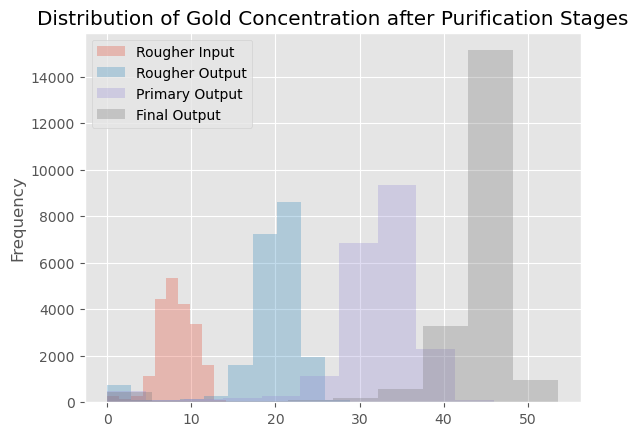

In [64]:
concentration_change(gold_data_full, 'rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au','Rougher Input', 'Rougher Output', 'Primary Output', 'Final Output', 'Distribution of Gold Concentration after Purification Stages')

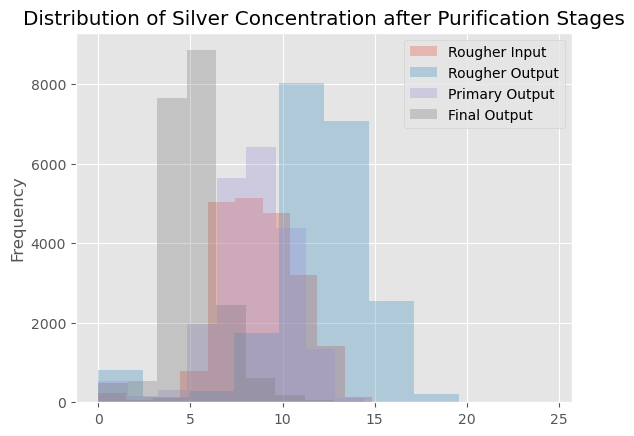

In [65]:
concentration_change(gold_data_full, 'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag','Rougher Input', 'Rougher Output', 'Primary Output', 'Final Output', 'Distribution of Silver Concentration after Purification Stages')

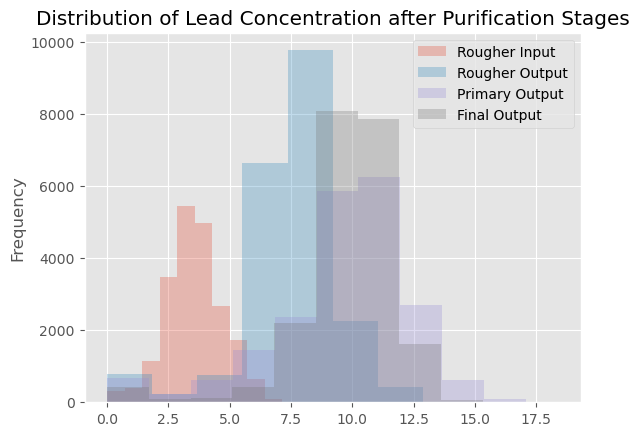

In [66]:
concentration_change(gold_data_full, 'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb','Rougher Input', 'Rougher Output', 'Primary Output', 'Final Output', 'Distribution of Lead Concentration after Purification Stages')

This function is written to evaluate the particle size distribution. After calling it for the test set and training set, I noted that the distributions are skewed to the right in both cases, but do not vary greatly.

In [67]:
def particle_size(df, column_4, titlename_1):
    
    particle = df.groupby([column_4])['date'].max()
    particle = particle.reset_index().rename(columns={column_4:column_4, 'date': 'date'})

    particle.plot(kind='hist',
                    bins=50,
                    title=titlename_1,
                    figsize=(15,20))

    plt.show()

    return

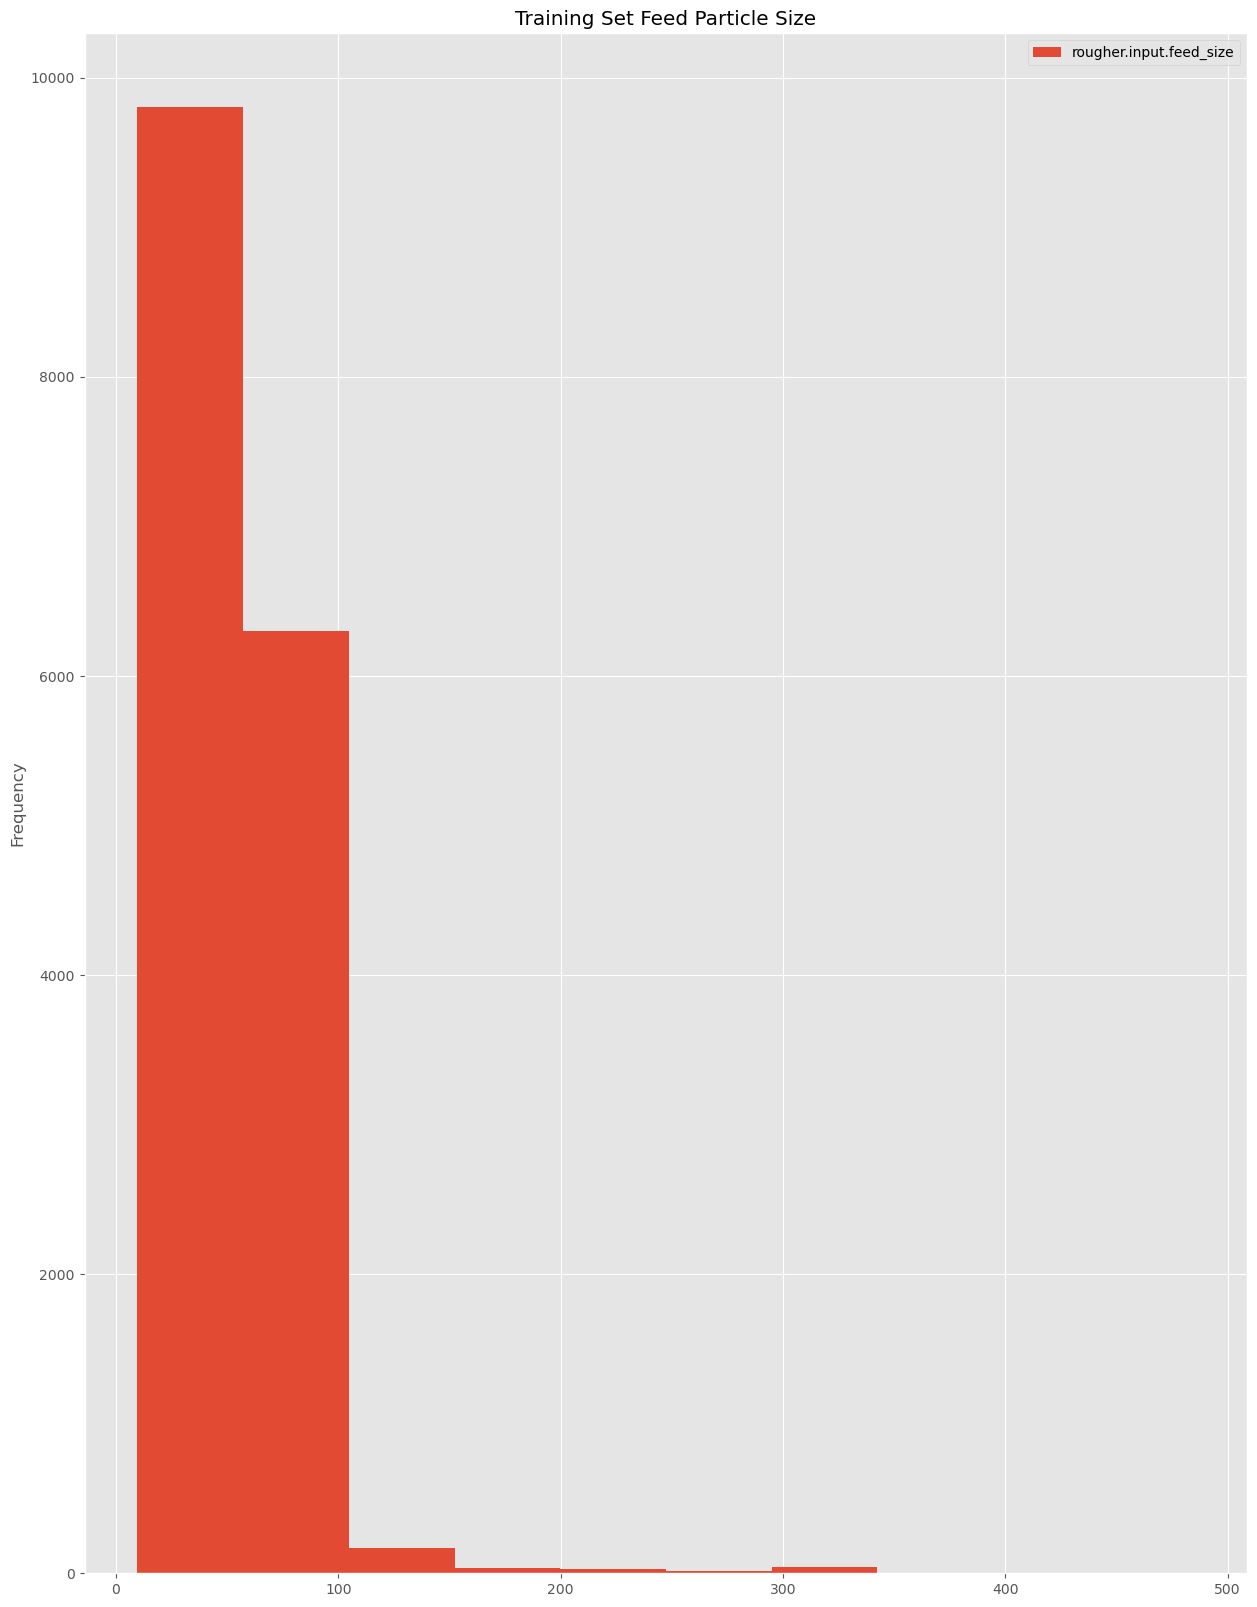

In [68]:
particle_size(gold_data_train, 'rougher.input.feed_size', 'Training Set Feed Particle Size')

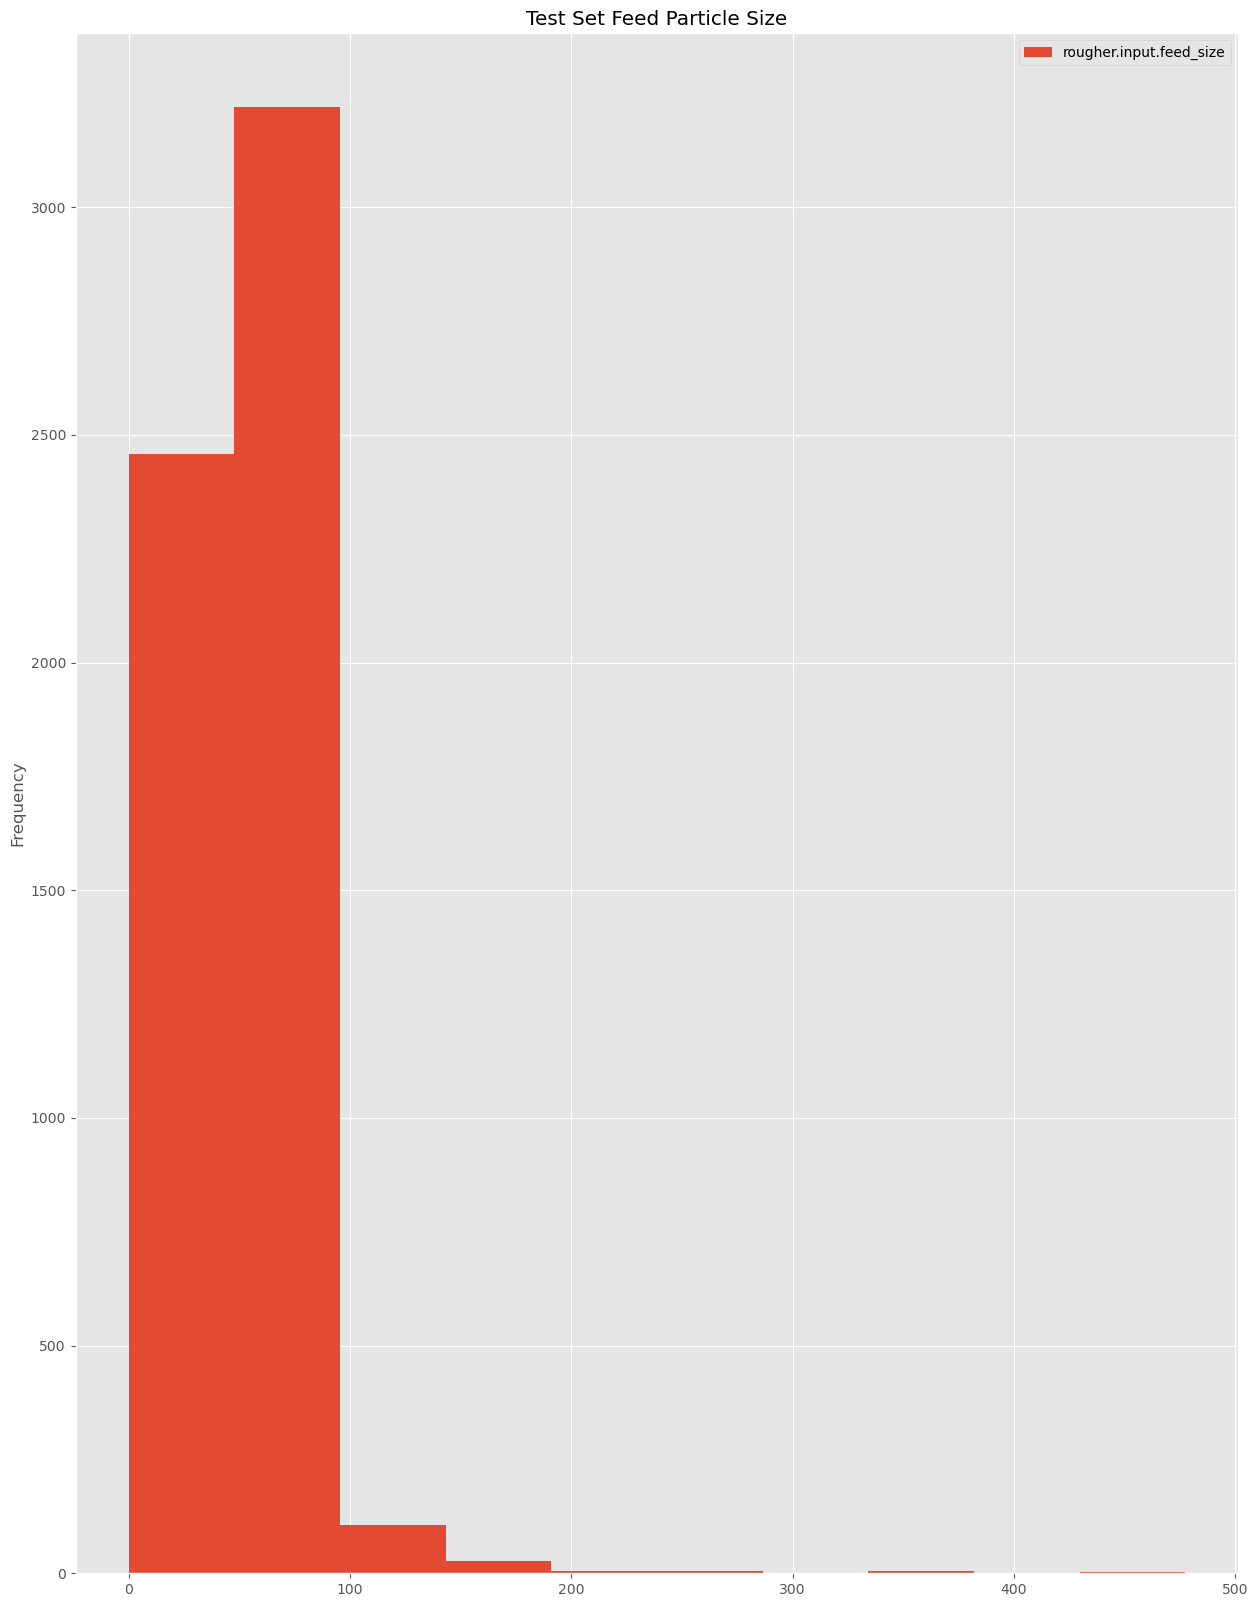

In [69]:
particle_size(gold_data_test, 'rougher.input.feed_size', 'Test Set Feed Particle Size')

This function calculates total concentration of all metals at the various stages, then calculates the different statistics including mean, median, and mode, as well as minimum and maximum values. I noted that a lot of values are zeroes. I dropped duplicates as a result, then created comparison histograms to see what the impact was. It seems that the impact is minimal. I am not sure what else to look for.

In [70]:
def total_concentration(df, column_1, column_2, column_3, titlename, label_1, label_2):

    tot_concentration = df.groupby([column_1, column_2, column_3])['date'].max()
    tot_concentration = tot_concentration.reset_index().rename(columns={column_1:column_1, column_2:column_2, column_3:column_3, 'date': 'date'})

    tot_concentration['total_concentration'] = tot_concentration[column_1] + tot_concentration[column_2] + tot_concentration[column_2] + tot_concentration[column_3]

    concentrate_mean = tot_concentration['total_concentration'].mean()
    concentrate_median = tot_concentration['total_concentration'].median()
    concentrate_mode = tot_concentration['total_concentration'].mode()
    concentrate_max = tot_concentration['total_concentration'].max()
    concentrate_min = tot_concentration['total_concentration'].min()
    
    tot_concentration['total_concentration'].plot(kind='hist',
                                 alpha=0.5,
                                 title=titlename,
                                 bins=50)

    tot_concentration_filtered = tot_concentration

    tot_concentration_filtered['total_concentration'] = tot_concentration_filtered['total_concentration'].drop_duplicates()
    
    tot_concentration_filtered['total_concentration'].plot(kind='hist',
                                 alpha=0.3,
                                 bins=50)
    
    plt.legend([label_1, label_2])
    plt.show()

    print(f'The substance concentrate mean is {concentrate_mean}. The substance concentrate median is {concentrate_median}. The substance concentrate mode is {concentrate_mode}. The maximum concentrate value is {concentrate_max}. The minimum concentrate value is {concentrate_min}.')

    return

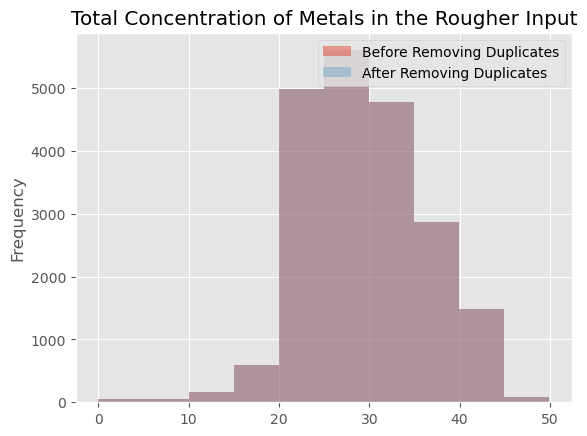

The substance concentrate mean is 29.451253364563488. The substance concentrate median is 28.703668103955614. The substance concentrate mode is 0         0.000000
1         0.040000
2         0.115922
3         0.136036
4         0.345910
           ...    
20683    49.238142
20684    49.322041
20685    49.356823
20686    49.687211
20687    49.916570
Name: total_concentration, Length: 20688, dtype: float64. The maximum concentrate value is 49.916569598967115. The minimum concentrate value is 0.0.


In [71]:
total_concentration(gold_data_full, 'rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'Total Concentration of Metals in the Rougher Input', 'Before Removing Duplicates', 'After Removing Duplicates')

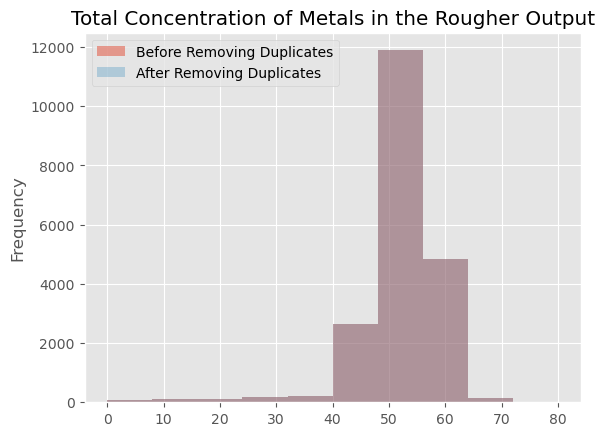

The substance concentrate mean is 52.030566509245894. The substance concentrate median is 52.49504589439312. The substance concentrate mode is 0         0.000000
1         0.039898
2         0.040000
3         0.044951
4         0.106460
           ...    
20183    70.367382
20184    70.876988
20185    77.736684
20186    77.984297
20187    80.048958
Name: total_concentration, Length: 20188, dtype: float64. The maximum concentrate value is 80.04895840625677. The minimum concentrate value is 0.0.


In [72]:
total_concentration(gold_data_full, 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'Total Concentration of Metals in the Rougher Output', 'Before Removing Duplicates', 'After Removing Duplicates')

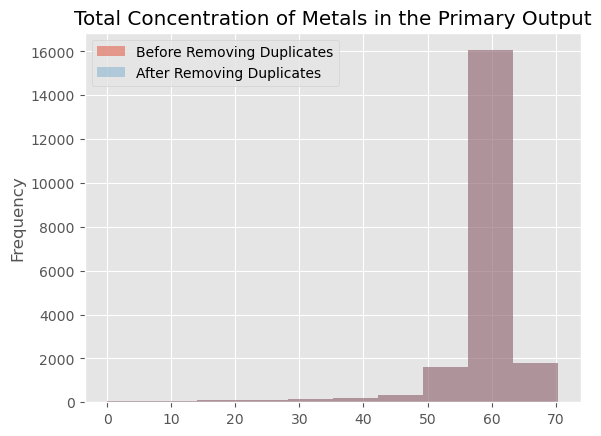

The substance concentrate mean is 59.034432175609616. The substance concentrate median is 60.694877776112726. The substance concentrate mode is 0         0.000000
1         0.040000
2         0.115268
3         0.257947
4         0.360155
           ...    
20446    68.502930
20447    68.608161
20448    68.683980
20449    69.027175
20450    70.383582
Name: total_concentration, Length: 20451, dtype: float64. The maximum concentrate value is 70.38358157530982. The minimum concentrate value is 0.0.


In [73]:
total_concentration(gold_data_full, 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'Total Concentration of Metals in the Primary Output', 'Before Removing Duplicates', 'After Removing Duplicates')

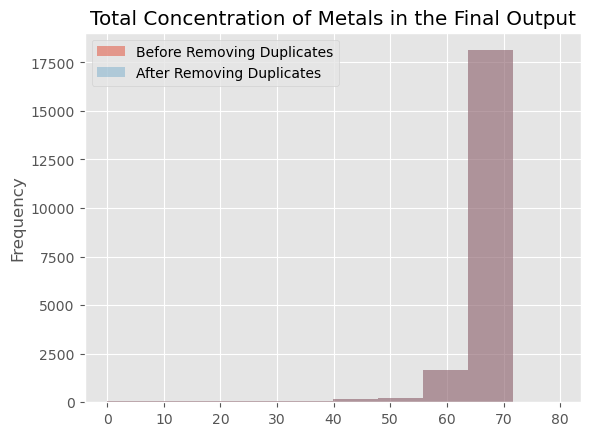

The substance concentrate mean is 64.3903247340441. The substance concentrate median is 65.40237262549694. The substance concentrate mode is 0         0.000000
1         0.040000
2         0.041906
3         0.165759
4         0.241458
           ...    
20478    78.274099
20479    78.449344
20480    79.271488
20481    79.442038
20482    79.641292
Name: total_concentration, Length: 20483, dtype: float64. The maximum concentrate value is 79.64129221184024. The minimum concentrate value is 0.0.


In [74]:
total_concentration(gold_data_full, 'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'Total Concentration of Metals in the Final Output', 'Before Removing Duplicates', 'After Removing Duplicates')

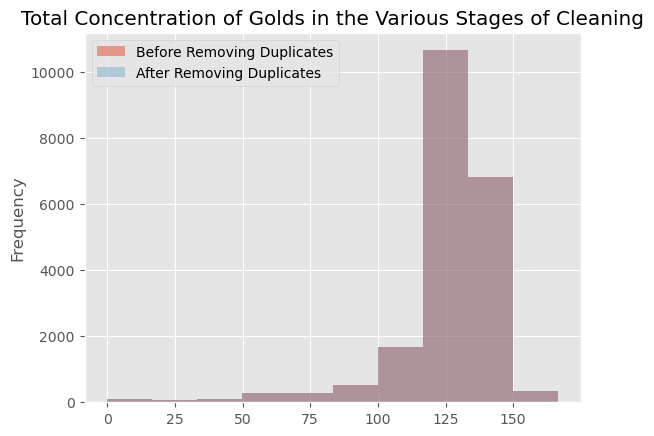

The substance concentrate mean is 126.1304874524027. The substance concentrate median is 129.61238159820104. The substance concentrate mode is 0          0.000000
1          0.040000
2          0.122374
3          0.176757
4          0.247951
            ...    
20801    162.006766
20802    163.993853
20803    164.710609
20804    165.686336
20805    166.577250
Name: total_concentration, Length: 20806, dtype: float64. The maximum concentrate value is 166.5772495676303. The minimum concentrate value is 0.0.


In [75]:
total_concentration(gold_data_full, 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 'Total Concentration of Golds in the Various Stages of Cleaning', 'Before Removing Duplicates', 'After Removing Duplicates')

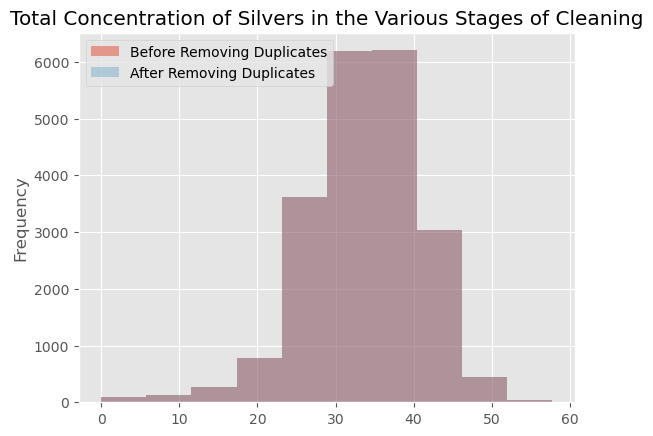

The substance concentrate mean is 33.67419605044439. The substance concentrate median is 33.99789421398226. The substance concentrate mode is 0         0.000000
1         0.040000
2         0.048493
3         0.072191
4         0.121951
           ...    
20802    56.394083
20803    56.704671
20804    56.720408
20805    57.635080
20806    57.748472
Name: total_concentration, Length: 20807, dtype: float64. The maximum concentrate value is 57.7484717230423. The minimum concentrate value is 0.0.


In [76]:
total_concentration(gold_data_full, 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'Total Concentration of Silvers in the Various Stages of Cleaning', 'Before Removing Duplicates', 'After Removing Duplicates')

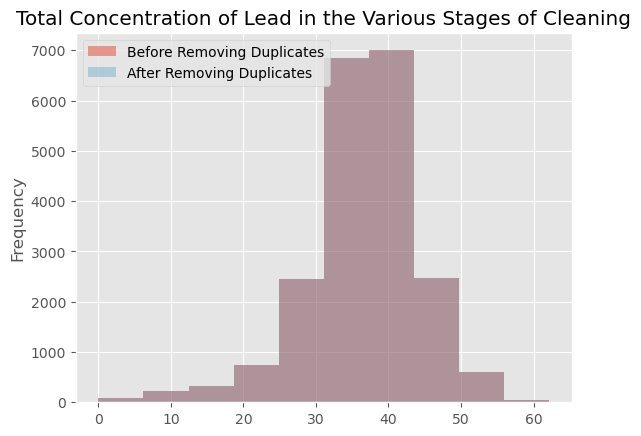

The substance concentrate mean is 36.53947369580368. The substance concentrate median is 37.091299507534956. The substance concentrate mode is 0         0.000000
1         0.013816
2         0.032610
3         0.040000
4         0.101817
           ...    
20775    58.885343
20776    59.041689
20777    59.331644
20778    60.859685
20779    62.158593
Name: total_concentration, Length: 20780, dtype: float64. The maximum concentrate value is 62.15859297037125. The minimum concentrate value is 0.0.


In [77]:
total_concentration(gold_data_full, 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 'Total Concentration of Lead in the Various Stages of Cleaning', 'Before Removing Duplicates', 'After Removing Duplicates')

<h2>Machine Learning Models</h2>


The sMAPE functions are written and will be used later.

In [218]:
def sMAPE(predicted, actual):
   sMAPE_value = 100 / len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))
   return sMAPE_value

def sMAPE_final(calculate_rougher, calculate_final):
    sMAPE_final_value = (calculate_rougher * 0.25) + (calculate_final * 0.75)
    return(sMAPE_final_value)



This code splits the data for both the rougher recovery and the final recovery data.

In [182]:
test_columns = gold_data_test.columns.values.tolist()
test_columns.append('rougher.output.recovery')
test_columns.append('final.output.recovery')
columns_to_drop = []

for column in gold_data_train.columns:
    if column not in test_columns: 
        columns_to_drop.append(column)

features_train = gold_data_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)

rougher_target_train = gold_data_train['rougher.output.recovery']
final_target_train = gold_data_train['final.output.recovery']

test_feature = gold_data_test.drop(['date'], axis=1)

test_indices = gold_data_test.index
rougher_test_target = gold_data_full.loc[test_indices, 'rougher.output.recovery']
final_test_target = gold_data_full.loc[test_indices, 'final.output.recovery']



These functions train the models and evaluate which model will be the best one. 

In [220]:
def train_decision_model(a, b, train_features_train, target_train):
    '''decision_model = DecisionTreeRegressor(random_state=54321)
    decision_model.fit(train_features_train, target_train)
    decision_scores = cross_val_score(decision_model, train_features_train, target_train, cv=5, scoring=make_scorer(sMAPE))
    final_score = sum(decision_scores) / len(decision_scores)
    print(final_score)'''
    best_decision_sMAPE = 0
    best_depth = 0

    for depth in range(a,b):
        decision_model = DecisionTreeRegressor(random_state=54321, max_depth=depth)
        decision_model.fit(train_features_train, target_train)
        decision_scores = cross_val_score(decision_model, train_features_train, target_train, cv=5, scoring=make_scorer(sMAPE))
        final_score = sum(decision_scores) / len(decision_scores)
        print('The sMAPE for', depth, 'is', final_score) 
          
        if best_decision_sMAPE == 0:
            best_decision_sMAPE = final_score
            best_depth = depth
        if final_score < best_decision_sMAPE:
            best_decision_sMAPE = final_score
            best_depth = depth
            
            

                
    decided_decision_model = DecisionTreeRegressor(random_state=54321, max_depth=best_depth)
    decided_decision_model.fit(train_features_train, target_train)
    decided_decision_scores = cross_val_score(decision_model, train_features_train, target_train, cv=5, scoring=make_scorer(sMAPE))
    decided_final_score = sum(decided_decision_scores) / len(decided_decision_scores) 
    print(best_depth)
    print(decided_final_score)
    
    return decided_final_score


In [224]:
def train_random_model(a, b, train_features_train, target_train):

    '''random_model = RandomForestRegressor(random_state=54321)
    random_model.fit(train_features_train, target_train)
    random_scores = cross_val_score(random_model, train_features_train, target_train, cv=5, scoring=make_scorer(sMAPE))
    final_score = sum(random_scores) / len(random_scores) 
    print(final_score)'''

    best_random_sMAPE = 0
    best_est = 0

    for est in range(a,b):
        random_model = RandomForestRegressor(random_state=54321, n_estimators=est)
        random_model.fit(train_features_train, target_train)
        random_scores = cross_val_score(random_model, train_features_train, target_train, cv=5, scoring=make_scorer(sMAPE))
        final_score = sum(random_scores) / len(random_scores)
        print('The sMAPE for', est, 'is', final_score) 
  
        if best_random_sMAPE == 0:
            best_random_sMAPE = final_score
            best_est = est
        if final_score < best_random_sMAPE:
            best_random_sMAPE = final_score
            best_est = est
            

    final_random_model = RandomForestRegressor(random_state=54321, n_estimators=best_est)
    final_random_model.fit(train_features_train, target_train)
    final_random_scores = cross_val_score(final_random_model, train_features_train, target_train, cv=5, scoring=make_scorer(sMAPE))
    final_final_score = sum(final_random_scores) / len(final_random_scores)
    print(best_est)
    print(final_final_score)

    return final_final_score

In [212]:
def train_linear_model(features_train, target_train):

    linear_model = LinearRegression()
    linear_model.fit(features_train, target_train)
    linear_scores = cross_val_score(linear_model, features_train, target_train, cv=5, scoring=make_scorer(sMAPE))
    final_score = sum(linear_scores) / len(linear_scores) 
    print(final_score)
    return final_score

In [222]:
rougher_decision_sMAPE = train_decision_model(1, 21, features_train, rougher_target_train)
final_decision_sMAPE = train_decision_model(1, 21, features_train, final_target_train)

26.373250739416353
26.995630755517908


In [225]:
rougher_random_sMAPE = train_random_model(10, 16, features_train, rougher_target_train)
final_random_sMAPE = train_random_model(10, 16, features_train, final_target_train)

18.833993083513352
15.5756786670307


In [216]:
rougher_linear_sMAPE = train_linear_model(features_train, rougher_target_train)
final_linear_sMAPE = train_linear_model(features_train, final_target_train)

20.705598444424687
15.722898213881578


In [228]:
print(sMAPE_final(rougher_decision_sMAPE, final_decision_sMAPE))
print(sMAPE_final(rougher_random_sMAPE, final_random_sMAPE))
print(sMAPE_final(rougher_linear_sMAPE, final_linear_sMAPE))

26.84003575149252
16.390257271151363
16.968573271517357


This comparison model uses DummyRegressor to compare the predicted median values to the predicted sMAPEs. 

In [ ]:
rougher_dummy_regr = DummyRegressor(strategy='median')
rougher_fit = rougher_dummy_regr.fit(features_train, rougher_target_train)
predict_score = rougher_dummy_regr.predict(test_feature)
rougher_dummy_score = sMAPE(predict_score, rougher_test_target)
print(rougher_dummy_score)

In [ ]:
final_dummy_regr = DummyRegressor(strategy='median')
final_fit = final_dummy_regr.fit(features_train, final_target_train)
predict_score = final_dummy_regr.predict(test_feature)
final_dummy_score = sMAPE(predict_score, final_test_target)
print(final_dummy_score)

In [ ]:
print(sMAPE_final(rougher_dummy_score, final_dummy_score))

Based on the final sMAPE, it appears that the best model is the Random Forest model. However, the linear model is very close behind, so I will use the Linear Regression model with the test data. 

In [229]:
#rougher_random_test_sMAPE = train_random_model(test_feature, rougher_test_target)
#final_random_test_sMAPE = train_random_model(test_feature, final_test_target)

27.298930841704628
17.052603577708123


In [230]:
rougher_linear_test_sMAPE = train_linear_model(test_feature, rougher_test_target)
final_linear_test_sMAPE = train_linear_model(test_feature, final_test_target)

22.53919351329783
17.17837054881875


In [231]:
#print(sMAPE_final(rougher_random_test_sMAPE, final_random_test_sMAPE))
print(sMAPE_final(rougher_linear_test_sMAPE, final_linear_test_sMAPE))

19.61418539370725
18.518576289938522


Based on the tests' final sMAPEs, the linear model works better, although the difference is not huge. The final sMAPEs are very close in the calculations when using the training data, and the linear model is much more efficient than the Random Forest model, so I am going to recommend that the linear model be used.

<h1>Conclusion</h1>
Based on what Zyfra is looking for, I think the Linear Regression model provides what it needs. Although the Random Forest model also provides similar conclusions, it is not as efficient in its runtime. The linear model provides an efficient model that will also maximize efficiency in ore development. The EDA also demonstrates that particle size and concentration increase as the process of cleaning and refining continues. This seems to be reflected slightly in the sMAPEs of all the models, although this could definitely be correlation and not causation. 